# **Scikit-learn Documentation**

**https://scikit-learn.org/stable/index.html**

#**Python Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ModuleNotFoundError: No module named 'plotly'

In [ ]:
! pip install

#**Machine Learning On Housing Price Prediction**

##Dataset with numerical target

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Features for housing data
square_footage = np.random.randint(800, 4000, n_samples)  # in square feet
bedrooms = np.random.randint(1, 6, n_samples)  # 1 to 5 bedrooms
bathrooms = np.random.randint(1, 4, n_samples)  # 1 to 3 bathrooms
house_age = np.random.randint(1, 100, n_samples)  # Age of the house in years
floors = np.random.randint(1, 3, n_samples)  # 1 or 2 floors
has_garage = np.random.choice([0, 1], n_samples)  # 0 or 1 (no garage, has garage)
distance_to_city = np.random.uniform(1, 30, n_samples)  # Distance to city center in miles
neighborhood_quality = np.random.randint(1, 6, n_samples)  # 1 to 5 scale (low to high)
property_tax_rate = np.random.uniform(0.5, 2.5, n_samples)  # Property tax rate in percentage
has_garden = np.random.choice([0, 1], n_samples)  # 0 or 1 (no garden, has garden)

# Target variable (price) based on a combination of features
price = (square_footage * 100) + (bedrooms * 15000) + (bathrooms * 10000) + \
        (house_age * -200) + (floors * 20000) + (has_garage * 25000) + \
        (distance_to_city * -500) + (neighborhood_quality * 10000) + \
        (property_tax_rate * -3000) + (has_garden * 15000)

# Create DataFrame for features
df_features = pd.DataFrame({
    'Square_Footage': square_footage,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'House_Age': house_age,
    'Floors': floors,
    'Has_Garage': has_garage,
    'Distance_to_City': distance_to_city,
    'Neighborhood_Quality': neighborhood_quality,
    'Property_Tax_Rate': property_tax_rate,
    'Has_Garden': has_garden
})

# Create DataFrame for target variable
df_target = pd.DataFrame(price, columns=['Price'])

# Combine features and target into one dataset
df_housing = pd.concat([df_features, df_target], axis=1)

df_housing.head()


,Square_Footage,Bedrooms,Bathrooms,House_Age,Floors,Has_Garage,Distance_to_City,Neighborhood_Quality,Property_Tax_Rate,Has_Garden,Price
0,3974,1,2,12,1,1,12.669782,5,1.556379,0,513995.973670
1,1660,5,2,2,2,0,26.653020,2,1.434522,1,317969.924145
2,2094,4,1,7,2,1,26.971323,5,0.713424,0,377374.067787
3,1930,2,2,80,2,0,27.366083,1,1.799112,1,272919.622631
4,1895,1,1,3,1,1,10.102464,5,2.235999,1,312140.770339


##Creating Features and Target Variable data frames

In [ ]:
X = df_housing.drop('Price', axis=1)
y = df_housing['Price']

##Feature Engineering (Scaling/Encoding)

1.   Min/Max or Standardize scaling for numerical features
2.   Encoding for categorical feature (In this case target variable)



In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Bedrooms              1000 non-null   int64  
 2   Bathrooms             1000 non-null   int64  
 3   House_Age             1000 non-null   int64  
 4   Floors                1000 non-null   int64  
 5   Has_Garage            1000 non-null   int64  
 6   Distance_to_City      1000 non-null   float64
 7   Neighborhood_Quality  1000 non-null   int64  
 8   Property_Tax_Rate     1000 non-null   float64
 9   Has_Garden            1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.2 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [ ]:
#scale numerical features
scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)

In [ ]:
#scale target variable
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

## Visulaize Correlation

<Axes: >

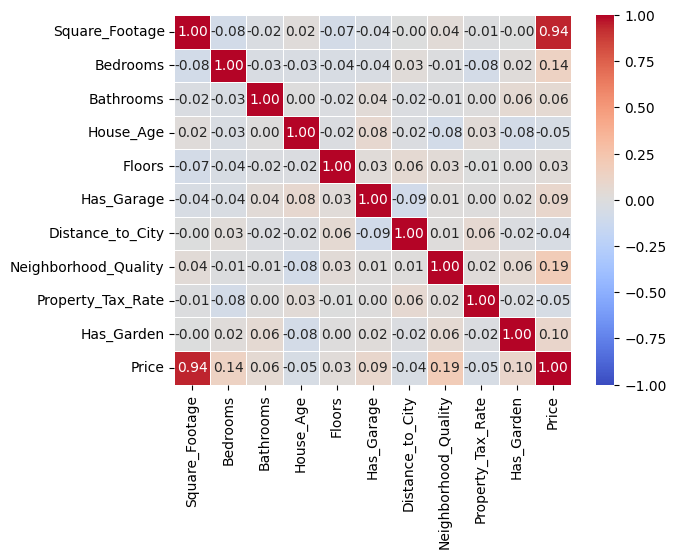

In [ ]:
#plot correlation of features
sns.heatmap(df_housing.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

##Spliting data into training and testing

In [ ]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size=0.2, random_state=42)

## Apply Regression

### Linear Regression

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [ ]:
# Extract coefficients and intercept
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

# Display the equation
equation = f"y = {intercept[0]:.2f}"
for i, coef in enumerate(coefficients[0]):
    equation += f" + ({coef:.2f}) * x{i+1}"

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
y = -0.01 + (0.72) * x1 + (0.14) * x2 + (0.05) * x3 + (-0.04) * x4 + (0.05) * x5 + (0.06) * x6 + (-0.03) * x7 + (0.09) * x8 + (-0.01) * x9 + (0.03) * x10


In [ ]:
#inverse predicted values
y_pred_lin_inv = scaler_y.inverse_transform(y_pred_lin)
y_test_inv = scaler_y.inverse_transform(y_test)

In [ ]:
#evaluate the model
mse_lin = mean_squared_error(y_test_inv, y_pred_lin_inv)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test_inv, y_pred_lin_inv)

In [ ]:
#generate report
print(f"Linear Regression - MSE: {mse_lin}, R^2 Score: {r2_lin}, RMSE: {rmse_lin}")

Linear Regression - MSE: 2.8553480651942465e-20, R^2 Score: 1.0, RMSE: 1.6897775194368773e-10


In [ ]:
#create predicted vs actual price dataframe
df_pred_lin= pd.DataFrame({'Actual': y_test_inv.flatten(), 'Predicted_Linear': y_pred_lin_inv.flatten()})
df_pred_lin.head()

,Actual,Predicted_Linear
0,378671.043433,378671.043433
1,482020.696070,482020.696070
2,297024.833418,297024.833418
3,493703.141160,493703.141160
4,475344.058842,475344.058842


In [ ]:
# Create the plot
fig = px.line(
    df_pred_lin,
    markers=True,
    title="Comparison of Actual and Predicted Price Using Linear regression",
)

# Show the plot
fig.show()

### Ridge Regression (L2)

In [ ]:
# Perform Grid Search to tune alpha
param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, scoring="neg_mean_squared_error", cv=10)
grid_search.fit(X_train, y_train)
print("Best alpha:", grid_search.best_params_['alpha'])

Best alpha: 0.001


In [ ]:
# Ridge Regression
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
# Extract coefficients and intercept
intercept = ridge_reg.intercept_
coefficients = ridge_reg.coef_

# Display the equation
equation = f"y = {intercept[0]:.2f}"
for i, coef in enumerate(coefficients[0]):
    equation += f" + ({coef:.2f}) * x{i+1}"

print("Ridge Regression Equation:")
print(equation)

Ridge Regression Equation:
y = -0.01 + (0.72) * x1 + (0.14) * x2 + (0.05) * x3 + (-0.04) * x4 + (0.05) * x5 + (0.06) * x6 + (-0.03) * x7 + (0.09) * x8 + (-0.01) * x9 + (0.03) * x10


In [ ]:
#inverse predicted values
y_pred_ridge_inv = scaler_y.inverse_transform(y_pred_ridge)
y_test_inv = scaler_y.inverse_transform(y_test)

In [ ]:
#evaluate the model
mse_ridge = mean_squared_error(y_test_inv, y_pred_ridge_inv)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test_inv, y_pred_ridge_inv)

In [ ]:
#generate report
print(f"Ridge Regression - MSE: {mse_ridge}, Ridge R^2 Score: {r2_ridge}, Ridge RMSE: {rmse_ridge}")

Ridge Regression - MSE: 1.574804576282603, Ridge R^2 Score: 0.9999999997924716, Ridge RMSE: 1.2549121787131572


In [ ]:
#create predicted vs actual price dataframe
df_pred_ridge= pd.DataFrame({'Actual': y_test_inv.flatten(), 'Predicted_Ridge': y_pred_ridge_inv.flatten()})
df_pred_ridge.head()

,Actual,Predicted_Ridge
0,378671.043433,378670.763313
1,482020.696070,482019.012959
2,297024.833418,297025.456821
3,493703.141160,493701.561312
4,475344.058842,475342.187714


In [ ]:
# Create the plot
fig = px.line(
    df_pred_ridge,
    markers=True,
    title="Comparison of Actual and Predicted Price Using Ridge regression",
)

# Show the plot
fig.show()

### Lasso Regression (L1)

In [ ]:
# Perform Grid Search to tune alpha
param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Lasso()
grid_search = GridSearchCV(ridge, param_grid, scoring="neg_mean_squared_error", cv=10)
grid_search.fit(X_train, y_train)

print("Best alpha:", grid_search.best_params_['alpha'])

Best alpha: 0.001


In [ ]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [ ]:
# Extract coefficients and intercept
intercept = lasso_reg.intercept_
coefficients = lasso_reg.coef_

# Display the equation
equation = f"y = {intercept[0]:.2f}"
for i, coef in enumerate(coefficients):
    equation += f" + ({coef:.2f}) * x{i+1}"

print("Lasso Regression Equation:")
print(equation)

Lasso Regression Equation:
y = 0.00 + (0.71) * x1 + (0.13) * x2 + (0.04) * x3 + (-0.03) * x4 + (0.04) * x5 + (0.05) * x6 + (-0.02) * x7 + (0.08) * x8 + (-0.00) * x9 + (0.03) * x10


In [ ]:
#inverse the values from scaller
y_pred_lasso_inv = scaler_y.inverse_transform(y_pred_lasso.reshape(-1,1))
y_test_inv = scaler_y.inverse_transform(y_test)

In [ ]:
#evaluate the model
mse_lasso = mean_squared_error(y_test_inv, y_pred_lasso_inv)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test_inv, y_pred_lasso_inv)

In [ ]:
#generate report
print(f"Lasso Regression - MSE: {mse_lasso}, Lasso R^2 Score: {r2_lasso}, Lasso RMSE: {rmse_lasso}")

Lasso Regression - MSE: 11936559.109745394, Lasso R^2 Score: 0.9984269945950288, Lasso RMSE: 3454.932576729305


In [ ]:
#create predicted vs actual price dataframe
df_pred_lasso= pd.DataFrame({'Actual': y_test_inv.flatten(),'Predicted_Lasso': y_pred_lasso_inv.flatten()})
df_pred_lasso.head()


,Actual,Predicted_Lasso
0,378671.043433,383837.886478
1,482020.696070,480859.577718
2,297024.833418,304513.867777
3,493703.141160,488246.777584
4,475344.058842,478266.728233


In [ ]:
# Create the plot
fig = px.line(
    df_pred_lasso,
    markers=True,
    title="Comparison of Actual and Predicted Price Using Lasso regression",
)

# Show the plot
fig.show()

### Polynomial Regression

In [ ]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=True)  # Add interaction and square terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model
y_pred = model.predict(X_test_poly)
print("MSE with Polynomial Features:", mean_squared_error(y_test, y_pred))

MSE with Polynomial Features: 8.976374284800029e-32


In [ ]:
#inverse predicted values
y_pred_lin_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

In [ ]:
#evaluate the model
mse_lin = mean_squared_error(y_test_inv, y_pred_lin_inv)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test_inv, y_pred_lin_inv)

In [ ]:
#generate report
print(f"Linear Regression - MSE: {mse_lin}, R^2 Score: {r2_lin}, RMSE: {rmse_lin}")

Linear Regression - MSE: 1.8710957804847494e-20, R^2 Score: 1.0, RMSE: 1.367880031466484e-10


### Principle Component Analysis

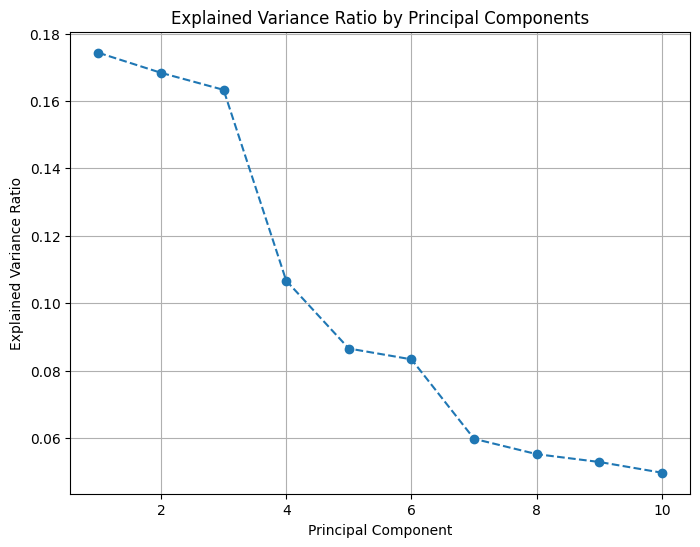

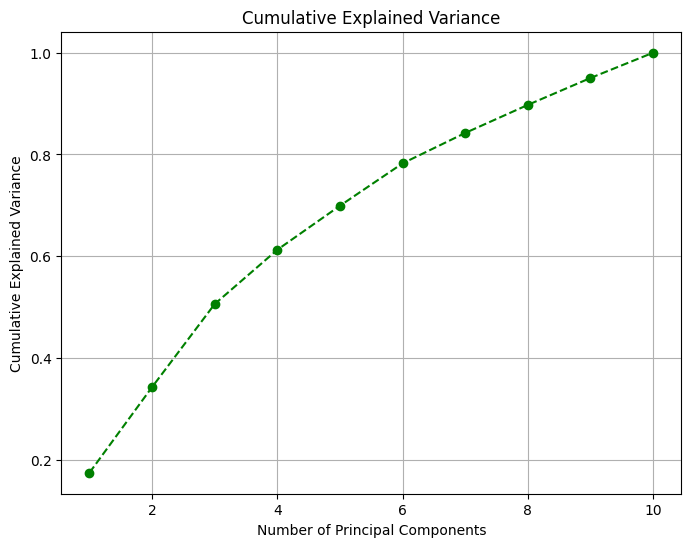

In [ ]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA-transformed features
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Visualize the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

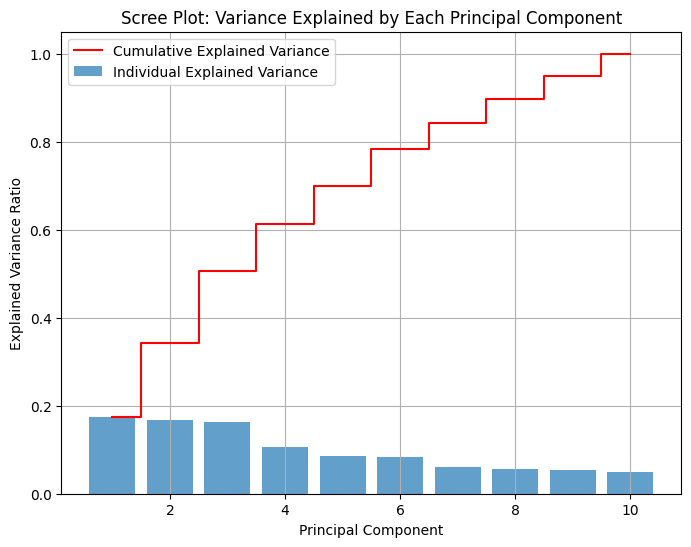

In [ ]:
# Plot Scree Plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), where='mid', label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Variance Explained by Each Principal Component')
plt.legend(loc='best')
plt.grid()
plt.show()

Since 10 Components Explains 90% Of Varaince

In [ ]:
#data with 10 principle components
X_top_pca= X_pca[:,:10]

Get the factor laoding

In [ ]:
# Get the loading matrix (coefficients of the components)
loadings = pca.components_

# Convert to DataFrame for better readability
loadings_df = pd.DataFrame(loadings.T, columns=[f"PC{i+1}" for i in range(10)], index=X.columns)

In [ ]:
# Display the loadings
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Square_Footage,-0.050917,0.035332,0.014302,-0.024888,-0.210319,-0.012684,-0.237480,0.818153,-0.333819,-0.337244
Bedrooms,-0.055017,0.057602,-0.017847,-0.132951,0.854653,0.416630,0.090602,0.203625,0.046241,-0.140848
Bathrooms,0.097228,0.116779,0.039576,0.975204,0.079654,0.125393,0.002398,0.042142,-0.020887,-0.005904
House_Age,0.004009,-0.048245,0.086628,0.019176,0.007456,-0.175481,0.094934,0.505116,0.675186,0.488779
Floors,0.487086,-0.636807,-0.586328,0.046592,0.056224,-0.016779,-0.029537,0.060387,0.018855,-0.054358
Has_Garage,0.699765,-0.107612,0.690398,-0.094088,0.040209,0.025367,0.024631,0.009387,-0.101444,-0.000890
Distance_to_City,-0.038301,-0.035673,-0.078206,-0.013201,0.017474,0.047348,0.488474,0.151758,-0.600255,0.605375
Neighborhood_Quality,0.066602,0.033256,-0.056621,-0.081880,-0.429356,0.873369,-0.013896,0.009987,0.159551,0.108068
Property_Tax_Rate,-0.005071,-0.012762,0.012525,0.016778,-0.171743,-0.040587,0.827888,0.065830,0.181466,-0.495547
Has_Garden,0.502055,0.748213,-0.400621,-0.110142,0.002807,-0.110248,0.026418,0.032342,0.027842,0.028422


Linear Regression After PCA

In [ ]:
#split data into training and testing
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_top_pca,y_scaled, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression with PCA
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train_pca)
y_pred_lin_pca = lin_reg_pca.predict(X_test_pca)

In [ ]:
#inverse predicted values
y_pred_lin_pca_inv = scaler_y.inverse_transform(y_pred_lin_pca)
y_test_inv_pca = scaler_y.inverse_transform(y_test_pca)

In [ ]:
#evaluate the model
mse_lin_pca = mean_squared_error(y_test_inv_pca, y_pred_lin_pca_inv)
rmse_lin_pca = np.sqrt(mse_lin_pca)
r2_lin_pca = r2_score(y_test_inv_pca, y_pred_lin_pca_inv)

In [ ]:
#generate report
print(f"Linear Regression - MSE: {mse_lin_pca}, R^2 Score: {r2_lin_pca}, RMSE: {rmse_lin_pca}")

Linear Regression - MSE: 8.156927282058913e-21, R^2 Score: 1.0, RMSE: 9.03157089440088e-11
